In [4]:
import librosa
import numpy as np
import os
import librosa.display
import matplotlib.pyplot as plt

# Define the path to the folder containing your wav files
folder_path = 'Data'

# Get the list of all wav files in the folder
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.wav')]

# Initialize lists to hold features and labels
features = []
labels = []

# Function to extract features
def extract_features(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Extract features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    
    # Combine features
    feature = np.concatenate((np.mean(mfcc, axis=1), 
                              np.mean(chroma, axis=1),
                              np.mean(spectral_contrast, axis=1),
                              np.mean(tonnetz, axis=1)))
    return feature



In [ ]:
# Loop through each file and extract features
for file_path in file_paths:
    feature = extract_features(file_path)
    features.append(feature)
    label = os.path.basename(file_path).split('_')[0]  # Assuming filenames are formatted with the maqam as the first part
    labels.append(label)

# Convert lists to numpy arrays for further processing
features = np.array(features)
labels = np.array(labels)

# Data is now ready for normalization, modeling, etc.


/home/dell/.local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/dell/.local/lib/python3.10/site-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


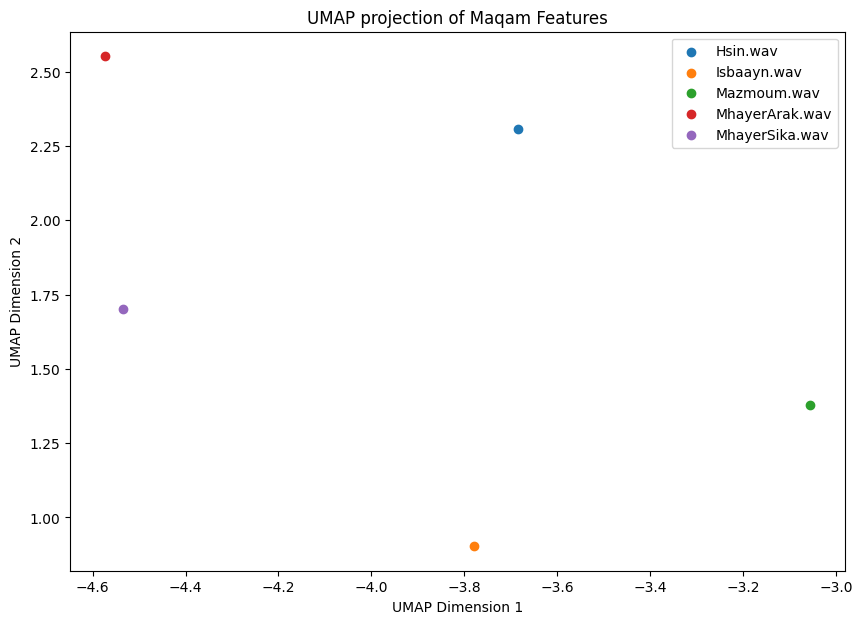

In [15]:
import umap
import matplotlib.pyplot as plt

# Assuming features and labels are already defined from the previous steps

# Apply UMAP to reduce dimensionality to 2D for visualization
umap_2d = umap.UMAP(n_components=2, random_state=42)
features_2d = umap_2d.fit_transform(features)

# Plotting the UMAP results
plt.figure(figsize=(10, 7))

# Scatter plot with labels as colors
for i, label in enumerate(np.unique(labels)):
    plt.scatter(features_2d[labels == label, 0], features_2d[labels == label, 1], label=label)

plt.title('UMAP projection of Maqam Features')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()


In [25]:
from pydub import AudioSegment
import os

# Define the path to the folder containing your wav files
folder_path = 'Data/WAV'
output_folder = 'Data/processed'  # Folder to save the split files

# Get the list of all wav files in the folder
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.wav')]

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to split the audio into three sections
def split_audio(file_path, output_folder):
    # Load the audio file
    audio = AudioSegment.from_wav(file_path)
    duration = len(audio)  # Duration in milliseconds

    # Calculate the duration of each section
    section_duration = duration // 5

    # Split the audio into three parts
    for i in range(5):
        start_time = i * section_duration
        end_time = (i + 1) * section_duration
        audio_section = audio[start_time:end_time]

        # Save the split audio section
        file_name = os.path.basename(file_path).replace('.wav', f'_part{i+1}.wav')
        audio_section.export(os.path.join(output_folder, file_name), format="wav")

# Loop through each file and split it into three sections
for file_path in file_paths:
    split_audio(file_path, output_folder)

print("Audio files have been split and saved successfully.")


Audio files have been split and saved successfully.


In [26]:
# Define the path to the folder containing your wav files
folder_path = 'Data/processed'

# Get the list of all wav files in the folder
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.wav')]

# Initialize lists to hold features and labels
features = []
labels = []

# Loop through each file and extract features
for file_path in file_paths:
    feature = extract_features(file_path)
    features.append(feature)
    label = os.path.basename(file_path).split('_')[0]  # Assuming filenames are formatted with the maqam as the first part
    labels.append(label)

# Convert lists to numpy arrays for further processing
features = np.array(features)
labels = np.array(labels)

# Data is now ready for normalization, modeling, etc.

/home/dell/.local/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=815
  warnings.warn(


/home/dell/.local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


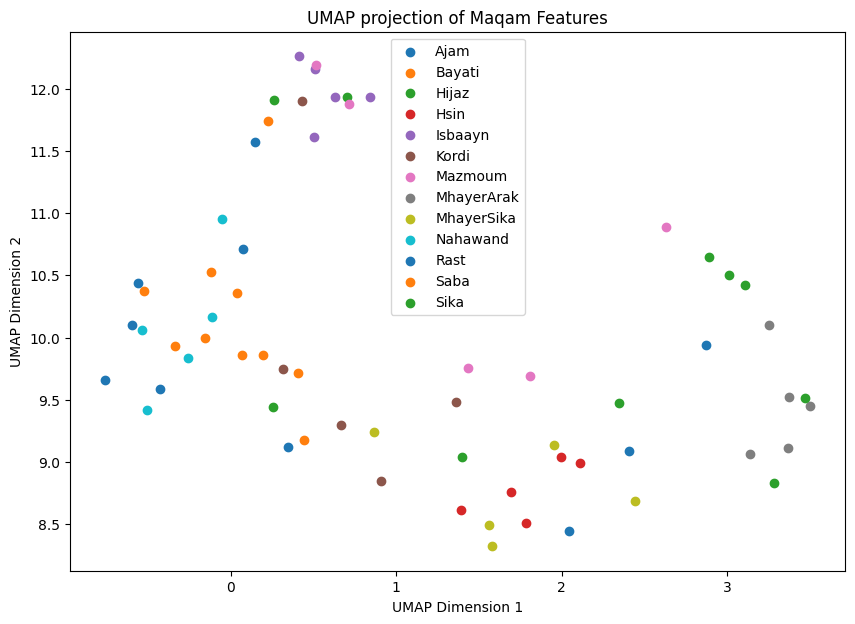

In [32]:
import umap
import matplotlib.pyplot as plt

# Assuming features and labels are already defined from the previous steps

# Apply UMAP to reduce dimensionality to 2D for visualization
umap_2d = umap.UMAP(n_components=3, random_state=42, n_neighbors=15)
features_2d = umap_2d.fit_transform(features)

# Plotting the UMAP results
plt.figure(figsize=(10, 7))

# Scatter plot with labels as colors
for i, label in enumerate(np.unique(labels)):
    plt.scatter(features_2d[labels == label, 0], features_2d[labels == label, 1], label=label)

plt.title('UMAP projection of Maqam Features')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()
